In [1]:
pip 
gap-stat


Note: you may need to restart the kernel to use updated packages.


In [2]:
# 1) Importar las bibliotecas necesarias:

import imblearn
import pickle
import folium
import os
import warnings
import seaborn as sns
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import imblearn
import statistics as stat
import gap_statistic
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

In [3]:
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans, vq
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from gap_statistic import OptimalK
from sklearn.cluster import KMeans

In [4]:
# Para generar un cluster en Python, puedes seguir los siguientes pasos generales:

# 1) Cargar los datos: carga tu conjunto de datos en Python usando una biblioteca como Pandas.
# Preprocesar los datos: asegúrate de que los datos estén limpios y formateados correctamente para su análisis. Esto puede incluir la eliminación de valores faltantes, la normalización de datos y la selección de variables relevantes.
# 2) Preprocesar los datos: asegúrate de que los datos estén limpios y formateados correctamente para su análisis. Esto puede incluir la eliminación de valores faltantes, la normalización de datos y la selección de variables relevantes.


In [5]:
# 2) Cargar los datos en un DataFrame de pandas:

df = pd.read_csv("C:/Users/Administrador/Desktop/respaldo disco/BIGDATA/Postgrado ORT/TESIS FINAL/Python_tesis/Proyecto/Completo 20230121.csv", encoding='latin-1')
df.head(3)


,msdynci_customerid,País de Venta,Vertical,Meses desde última Factura,Cant de equipos arrendados,Antiguedad,Casos abiertos en ult 12 meses,Casos abiertos,Cant com en ult 24 meses,Scores 2.Encuestas,Ren aut de contrato,Facturacion,Casos Creados_completo.Catidad de Incidentes,Casos Creados_completo.Cantidad de Reclamos,Casos Creados_completo.Tiempo de respuesta promedio,Casos Creados_completo.Fraccion a tiempo,Churn
0,0d14eaf6e21c1292026c7b40ceae396e,Puerto Rico,SERVICIOS - SRV,5,1,1.57,0,0,0,Indiferente,0.00,Facturación muy baja,0,0,0.00,0.00,0
1,2fb88bef68c15bdabd29702c7f7dbf5f,Brasil,COMERCIO - CMR,1,1,1.54,4,0,4,Indiferente,0.00,Facturación muy baja,38,15,53.26,0.70,0
2,000ef4f31d53a8315a51f7f5c2d1b6a2,Chile,COMERCIO - CMR,0,2,1.69,0,0,14,Indiferente,0.00,Facturación alta,22,0,58.32,0.50,0


In [6]:
df1 = df.rename(columns={"msdynci_customerid": "customer_id", 'Facturacion': "Categoría_de_facturación", 'Cant com en ult 24 meses': "Cant_de_comunic_últimos_24_meses", 'Antiguedad': "Antiguedad_de_Clientes", 'Scores 2.Encuestas': "Encuestas", 'Casos Creados_completo.Catidad de Incidentes': "Cantidad_de_Incidentes",
                'Casos Creados_completo.Cantidad de Reclamos': "Cantidad_de_Reclamos", 'Casos Creados_completo.Fraccion a tiempo': "Tiempo_de_respuesta", 'Casos Creados_completo.Tiempo de respuesta promedio': "Tiempo promedio de respuesta", 'Ren aut de contrato': 'Ren_aut_de_contrato'})


In [7]:
df1.head(4)

,customer_id,País de Venta,Vertical,Meses desde última Factura,Cant de equipos arrendados,Antiguedad_de_Clientes,Casos abiertos en ult 12 meses,Casos abiertos,Cant_de_comunic_últimos_24_meses,Encuestas,Ren_aut_de_contrato,Categoría_de_facturación,Cantidad_de_Incidentes,Cantidad_de_Reclamos,Tiempo promedio de respuesta,Tiempo_de_respuesta,Churn
0,0d14eaf6e21c1292026c7b40ceae396e,Puerto Rico,SERVICIOS - SRV,5,1,1.57,0,0,0,Indiferente,0.00,Facturación muy baja,0,0,0.00,0.00,0
1,2fb88bef68c15bdabd29702c7f7dbf5f,Brasil,COMERCIO - CMR,1,1,1.54,4,0,4,Indiferente,0.00,Facturación muy baja,38,15,53.26,0.70,0
2,000ef4f31d53a8315a51f7f5c2d1b6a2,Chile,COMERCIO - CMR,0,2,1.69,0,0,14,Indiferente,0.00,Facturación alta,22,0,58.32,0.50,0
3,c26a37091399b830ec01f7fe3f5fa484,Perú,TRANSPORTES - TRN/LOGISTICAS,22,0,1.69,0,0,21,Indiferente,0.00,Facturación muy baja,0,0,0.00,0.00,1


In [8]:
df1 = df1.drop(['customer_id', 'Churn'], axis=1)
df1.head()


,País de Venta,Vertical,Meses desde última Factura,Cant de equipos arrendados,Antiguedad_de_Clientes,Casos abiertos en ult 12 meses,Casos abiertos,Cant_de_comunic_últimos_24_meses,Encuestas,Ren_aut_de_contrato,Categoría_de_facturación,Cantidad_de_Incidentes,Cantidad_de_Reclamos,Tiempo promedio de respuesta,Tiempo_de_respuesta
0,Puerto Rico,SERVICIOS - SRV,5,1,1.57,0,0,0,Indiferente,0.00,Facturación muy baja,0,0,0.00,0.00
1,Brasil,COMERCIO - CMR,1,1,1.54,4,0,4,Indiferente,0.00,Facturación muy baja,38,15,53.26,0.70
2,Chile,COMERCIO - CMR,0,2,1.69,0,0,14,Indiferente,0.00,Facturación alta,22,0,58.32,0.50
3,Perú,TRANSPORTES - TRN/LOGISTICAS,22,0,1.69,0,0,21,Indiferente,0.00,Facturación muy baja,0,0,0.00,0.00
4,Costa Rica,GUBERNAMENTAL - GSV,1,3,1.55,0,0,1,Indiferente,1.00,Facturación muy alta,3,4,54.86,0.29


In [9]:
# 3) Codificar las variables categóricas utilizando LabelEncoder:

le = LabelEncoder()

df2 = df1.copy(deep=True)
text_data_features = [i for i in list(
    df1.columns) if i not in list(df1.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features:
    df2[i] = le.fit_transform(df2[i])
    print(i, ' : ', df2[i].unique(), ' = ',
          le.inverse_transform(df2[i].unique()))


# Creamos una copia profunda del conjunto de datos original y etiquetamos la codificación de los datos de texto.

Label Encoder Transformation
País de Venta  :  [11  1  2 10  4  7  3  9  6  8  5  0]  =  ['Puerto Rico' 'Brasil' 'Chile' 'Perú' 'Costa Rica' 'Guatemala' 'Colombia'
 'Panamá' 'El Salvador' 'México' 'Dominicana' 'Argentina']
Vertical  :  [26  5 29 13 25 10 20 19 22  9 14 12  7  1 18 23  3 11 15 28  2 27  6  0
 21  8 24  4 17 16]  =  ['SERVICIOS - SRV' 'COMERCIO - CMR' 'TRANSPORTES - TRN/LOGISTICAS'
 'GUBERNAMENTAL - GSV' 'RETAIL - RTL' 'ENERGIA - ENRG' 'MINERIA - MIN'
 'MANUFACTURA - MNF' 'OTHER' 'EDUCACION - EDU' 'HOSPITALES/SALUD - HSP'
 'GRAPHIC COMMUNICATIONS-GC' 'CONSTRUCCION - CNSTR' 'AGRICULTURA-AGRO'
 'LEGALES - LGL' 'PETROLEO - PTR' 'BANCA - BNK' 'FARMACEUTICAS - PHA'
 'HOTELES/TURISMO - HTL' 'SIN FINES DE LUCRO - NPS' 'ASEGURADORAS - INS'
 'SERVICIOS PROFESIONALES' 'COMUNICACIONES - CMT'
 'AGENCIAS DE PUBLICIDAD - PUB' 'OFICINAS PROFESIONALES - OFPRO'
 'COOPERATIVAS-COOP' 'RELIGIOSOS - REL' 'BIENES RAICES-REALESTATE'
 'INTERCOMPANIES - INT' 'INDIVIDUAL PROFESSIONAL']
Encuestas 

In [10]:
df2.head(5)

,País de Venta,Vertical,Meses desde última Factura,Cant de equipos arrendados,Antiguedad_de_Clientes,Casos abiertos en ult 12 meses,Casos abiertos,Cant_de_comunic_últimos_24_meses,Encuestas,Ren_aut_de_contrato,Categoría_de_facturación,Cantidad_de_Incidentes,Cantidad_de_Reclamos,Tiempo promedio de respuesta,Tiempo_de_respuesta
0,11,26,5,1,1.57,0,0,0,0,0.00,3,0,0,0.00,0.00
1,1,5,1,1,1.54,4,0,4,0,0.00,3,38,15,53.26,0.70
2,2,5,0,2,1.69,0,0,14,0,0.00,0,22,0,58.32,0.50
3,10,29,22,0,1.69,0,0,21,0,0.00,3,0,0,0.00,0.00
4,4,13,1,3,1.55,0,0,1,0,1.00,2,3,4,54.86,0.29


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24951 entries, 0 to 24950
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   País de Venta                     24951 non-null  int32  
 1   Vertical                          24951 non-null  int32  
 2   Meses desde última Factura        24951 non-null  int64  
 3   Cant de equipos arrendados        24951 non-null  int64  
 4   Antiguedad_de_Clientes            24951 non-null  float64
 5   Casos abiertos en ult 12 meses    24951 non-null  int64  
 6   Casos abiertos                    24951 non-null  int64  
 7   Cant_de_comunic_últimos_24_meses  24951 non-null  int64  
 8   Encuestas                         24951 non-null  int32  
 9   Ren_aut_de_contrato               24951 non-null  float64
 10  Categoría_de_facturación          24951 non-null  int32  
 11  Cantidad_de_Incidentes            24951 non-null  int64  
 12  Cant

In [12]:
# 4) Normalizar las variables utilizando StandardScaler:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df2)
data_scaled


array([[ 1.57694281,  1.14903661, -0.08759955, ..., -0.11456977,
        -1.067698  , -0.90815437],
       [-1.2434794 , -1.27922946, -0.60477115, ...,  0.12274237,
         0.81908314,  1.31130299],
       [-0.96143718, -1.27922946, -0.73406405, ..., -0.11456977,
         0.99833797,  0.67717232],
       ...,
       [ 1.57694281, -1.27922946, -0.47547825, ..., -0.11456977,
        -1.067698  , -0.90815437],
       [ 1.57694281,  0.68650974, -0.60477115, ..., -0.11456977,
        -1.067698  , -0.90815437],
       [ 1.57694281, -1.16359774, -0.73406405, ..., -0.11456977,
        -1.067698  , -0.90815437]])

In [13]:
# 5) Determinar el número óptimo de clusters utilizando el método del codo:

# Ejecutar el algoritmo de KMeans con diferentes valores de k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df2)
    distortions.append(kmeanModel.inertia_)

In [14]:
# 5.1) Regla del Codo (método elbow): 

In [15]:
# Método del codo (Elbow Method): Este método consiste en ejecutar el algoritmo de clustering con diferentes valores de k (número de clusters) y graficar la suma de las distancias cuadradas de cada punto al centro de su cluster más cercano. El punto en el gráfico donde la curva tiene una forma de "codo" o donde la reducción de la distancia entre los puntos y su centro de cluster se desacelera significativamente es considerado el número óptimo de clusters.

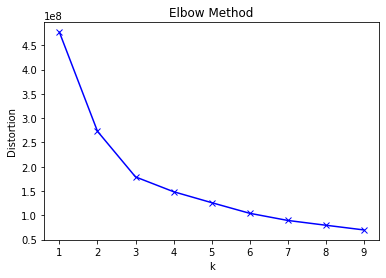

In [16]:
# 1) Graficar la curva del codo: 
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

In [17]:
# 5.2) Silhouette: 

In [18]:
# Método Silhouette: El coeficiente de Silhouette es una medida de cuán similar es un punto a su propio cluster en comparación con otros clusters. Este método implica ejecutar el algoritmo de clustering con diferentes valores de k y graficar el coeficiente de Silhouette para cada uno. El número óptimo de clusters se corresponde con el valor de k que tiene el coeficiente de Silhouette más alto.

In [19]:
# Ejecutar el algoritmo de KMeans con diferentes valores de k
silhouette_scores = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df2)
    score = silhouette_score(df2, kmeanModel.labels_)
    silhouette_scores.append(score)

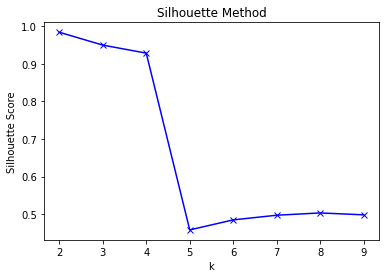

In [20]:
# Graficar los valores del coeficiente Silhouette para cada k
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

In [21]:
# 6) Realizar el clustering utilizando K-Means con el número óptimo de clusters:

# Elegir el número de clusters optimo: 

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
# kmeans = KMeans(n_clusters=3)

In [22]:
# Entrenar el modelo
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [23]:
# 7) Agregar las etiquetas de cluster al DataFrame original:

df['Cluster'] = kmeans.labels_
df


,msdynci_customerid,País de Venta,Vertical,Meses desde última Factura,Cant de equipos arrendados,Antiguedad,Casos abiertos en ult 12 meses,Casos abiertos,Cant com en ult 24 meses,Scores 2.Encuestas,Ren aut de contrato,Facturacion,Casos Creados_completo.Catidad de Incidentes,Casos Creados_completo.Cantidad de Reclamos,Casos Creados_completo.Tiempo de respuesta promedio,Casos Creados_completo.Fraccion a tiempo,Churn,Cluster
0,0d14eaf6e21c1292026c7b40ceae396e,Puerto Rico,SERVICIOS - SRV,5,1,1.57,0,0,0,Indiferente,0.00,Facturación muy baja,0,0,0.00,0.00,0,0
1,2fb88bef68c15bdabd29702c7f7dbf5f,Brasil,COMERCIO - CMR,1,1,1.54,4,0,4,Indiferente,0.00,Facturación muy baja,38,15,53.26,0.70,0,1
2,000ef4f31d53a8315a51f7f5c2d1b6a2,Chile,COMERCIO - CMR,0,2,1.69,0,0,14,Indiferente,0.00,Facturación alta,22,0,58.32,0.50,0,1
3,c26a37091399b830ec01f7fe3f5fa484,Perú,TRANSPORTES - TRN/LOGISTICAS,22,0,1.69,0,0,21,Indiferente,0.00,Facturación muy baja,0,0,0.00,0.00,1,0
4,00109cbd2395b622807dc4835badcd96,Costa Rica,GUBERNAMENTAL - GSV,1,3,1.55,0,0,1,Indiferente,1.00,Facturación muy alta,3,4,54.86,0.29,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24946,ee53ae1c80e1fbcad0c2266a32e1b2a8,Colombia,COMUNICACIONES - CMT,1,3,1.68,0,0,8,Indiferente,0.00,Facturación alta,3,7,56.90,0.40,0,1
24947,f029a18cb2e36d63fe5ee5d3098bdf6f,Colombia,COMERCIO - CMR,1,2,1.68,0,0,2,Indiferente,0.00,Facturación muy alta,3,0,46.33,0.67,0,1
24948,f1602f28ade800e3162764c31ceaf50c,Puerto Rico,COMERCIO - CMR,2,4,0.86,0,0,4,Indiferente,0.00,Facturación muy alta,0,0,0.00,0.00,0,0
24949,f5a12bf7b7d3b5edc8b03f67e4fabbb6,Puerto Rico,OTHER,1,21,1.57,0,0,1,Indiferente,0.00,Facturación muy alta,0,0,0.00,0.00,0,0


In [24]:
# 7) Agregar las etiquetas de cluster al DataFrame:

df2['Cluster'] = kmeans.labels_
df2

,País de Venta,Vertical,Meses desde última Factura,Cant de equipos arrendados,Antiguedad_de_Clientes,Casos abiertos en ult 12 meses,Casos abiertos,Cant_de_comunic_últimos_24_meses,Encuestas,Ren_aut_de_contrato,Categoría_de_facturación,Cantidad_de_Incidentes,Cantidad_de_Reclamos,Tiempo promedio de respuesta,Tiempo_de_respuesta,Cluster
0,11,26,5,1,1.57,0,0,0,0,0.00,3,0,0,0.00,0.00,0
1,1,5,1,1,1.54,4,0,4,0,0.00,3,38,15,53.26,0.70,1
2,2,5,0,2,1.69,0,0,14,0,0.00,0,22,0,58.32,0.50,1
3,10,29,22,0,1.69,0,0,21,0,0.00,3,0,0,0.00,0.00,0
4,4,13,1,3,1.55,0,0,1,0,1.00,2,3,4,54.86,0.29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24946,3,6,1,3,1.68,0,0,8,0,0.00,0,3,7,56.90,0.40,1
24947,3,5,1,2,1.68,0,0,2,0,0.00,2,3,0,46.33,0.67,1
24948,11,5,2,4,0.86,0,0,4,0,0.00,2,0,0,0.00,0.00,0
24949,11,22,1,21,1.57,0,0,1,0,0.00,2,0,0,0.00,0.00,0


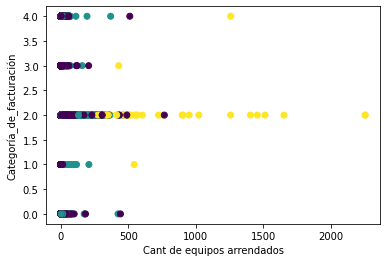

In [25]:
# 8) Gráficos

# Visualizar los clusters
plt.scatter(df2['Cant de equipos arrendados'], df2['Categoría_de_facturación'], c=kmeans.labels_)
plt.xlabel('Cant de equipos arrendados')
plt.ylabel('Categoría_de_facturación')
plt.show()

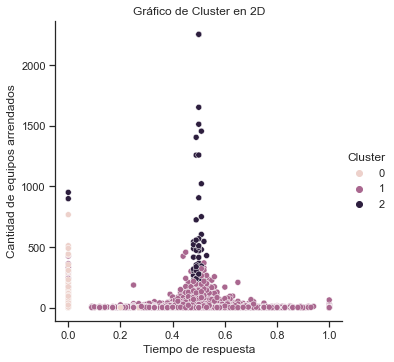

In [43]:
# otra forma de graficar:
sns.set(style="ticks")
# Crear el gráfico con sns.relplot()
graph=sns.relplot(x='Tiempo_de_respuesta', y='Cant de equipos arrendados', data=df2,
            kind='scatter', hue='Cluster')

# Personalizar los títulos de los ejes
graph.set(xlabel='Tiempo de respuesta',
          ylabel='Cantidad de equipos arrendados')
plt.title('Gráfico de Cluster en 2D')
# Mostrar el gráfico
plt.show()


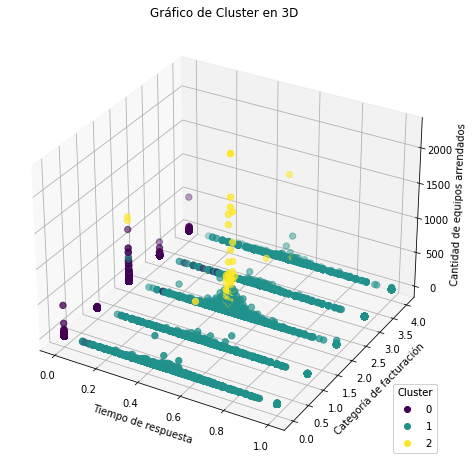

In [39]:
######## grafico 3D ##########
fig = plt.figure(figsize=(10, 8))  # establecer el tamaño de la figura
#fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df2['Tiempo_de_respuesta'])
y = np.array(df2['Categoría_de_facturación'])
z = np.array(df2['Cant de equipos arrendados'])

scatter=ax.scatter(x, y, z, c=df2["Cluster"], s=40)

# agregar leyenda
legend = ax.legend(*scatter.legend_elements(),
                   loc="lower right", title="Cluster")
ax.add_artist(legend)

ax.set_title("Gráfico de Cluster en 3D")  # agregar título al gráfico

ax.set_xlabel("Tiempo de respuesta")  # agregar título al eje x
ax.set_ylabel("Categoría de facturación")  # agregar título al eje y
ax.set_zlabel("Cantidad de equipos arrendados")  # agregar título al eje z


plt.show()

In [ ]:
# agregar leyenda
legend = ax.legend(*scatter.legend_elements(),
                   loc="lower right", title="Legend Title")
ax.add_artist(legend)


In [ ]:
# gráfica de los cluster: 
fig = px.scatter_matrix(df2,
    dimensions=['Cant de equipos arrendados', 'Casos abiertos','Cant_de_comunic_últimos_24_meses','Cantidad_de_Incidentes',],
    color='Cluster')
# Ajustar el tamaño de la figura y el estilo de la fuente
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=6,
        color="RebeccaPurple"
    ),
    width=800,
    height=600,
)
# Ajustar el estilo de los trazos y agregar información sobre herramientas interactivas
#fig.update_traces(
#    marker=dict(color='rgb(158,202,225)', line=dict(color='rgb(8,48,107)', width=1.5)),
#    hovertemplate='Año: %{x}<br>Población: %{y:,}<br>Continente: %{marker.color}'
#)
fig.show()


In [ ]:
# 9) pasar a un csv los cluster: 
df.to_csv('resultados_cluster_final.csv', index=False)